In [22]:
# 0. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [23]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [26]:
df.shape
df.info()
df['Churn'].value_counts()         # class balance
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# convert TotalCharges to numeric (coerce errors), and fill or drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()   # small number possible
df = df.dropna(subset=['TotalCharges'])  # or impute if you prefer


In [28]:
# Drop customerID
df = df.drop(columns=['customerID'])

# Binary map for 'Yes'/'No' columns (including Churn)
binary_cols = [c for c in df.columns if df[c].nunique()==2 and df[c].dtype=='object']
for c in binary_cols:
    if c == 'gender':
        df[c] = df[c].map({'Female':0, 'Male':1})
    else:
        df[c] = df[c].map({'Yes':1, 'No':0})

# One-hot encode remaining categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate X and y
y = df['Churn']          # 1 = churn, 0 = not churn
X = df.drop(columns=['Churn'])

# Scale numeric features (optional but helpful)
num_cols = ['tenure','MonthlyCharges','TotalCharges']   # change if different names
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [30]:
# Assuming 'df' at this point still contains the original categorical columns
# before one-hot encoding, but after handling TotalCharges and dropping customerID.
# If not, you may need to reload or create a copy earlier.

# Create a copy of the dataframe before one-hot encoding for later use
# df_orig = df.copy() # No longer needed as we will use df before one-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

# Split the dataframe *before* one-hot encoding based on the indices of the test set
# Need to re-load or get the dataframe state before one-hot encoding
# Assuming the state of 'df' right after handling TotalCharges and dropping customerID is the one before one-hot encoding
df_before_onehot = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_before_onehot['TotalCharges'] = pd.to_numeric(df_before_onehot['TotalCharges'], errors='coerce')
df_before_onehot = df_before_onehot.dropna(subset=['TotalCharges'])
# df_before_onehot = df_before_onehot.drop(columns=['customerID']) # Keep customerID here


df_test_orig = df_before_onehot.loc[X_test.index].copy()

In [31]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Accuracy: 0.7903340440653873
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



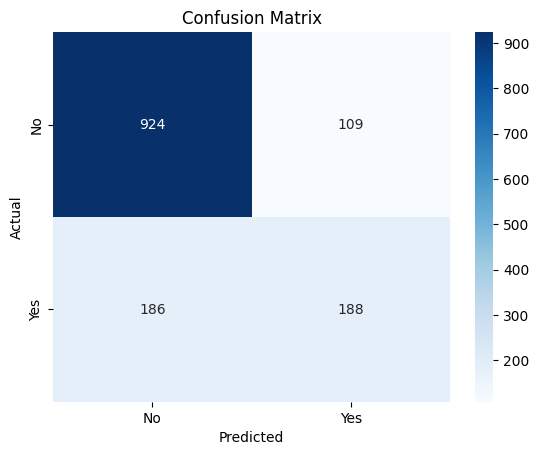

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix'); plt.show()


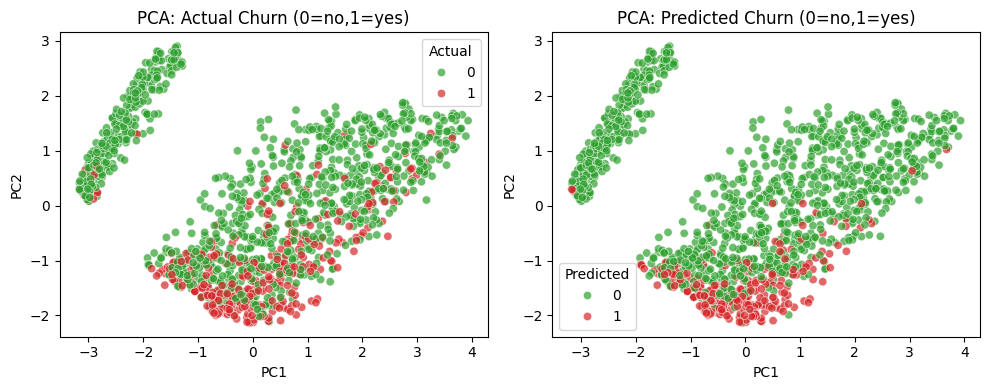

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_test)   # using processed & scaled X_test

# Make a DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': X_pca[:,0],
    'PC2': X_pca[:,1],
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Plot actual labels
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Actual', palette=['#2ca02c','#d62728'], alpha=0.7)
plt.title('PCA: Actual Churn (0=no,1=yes)')

# Plot predicted labels
plt.subplot(1,2,2)
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Predicted', palette=['#2ca02c','#d62728'], alpha=0.7)
plt.title('PCA: Predicted Churn (0=no,1=yes)')
plt.tight_layout()
plt.show()


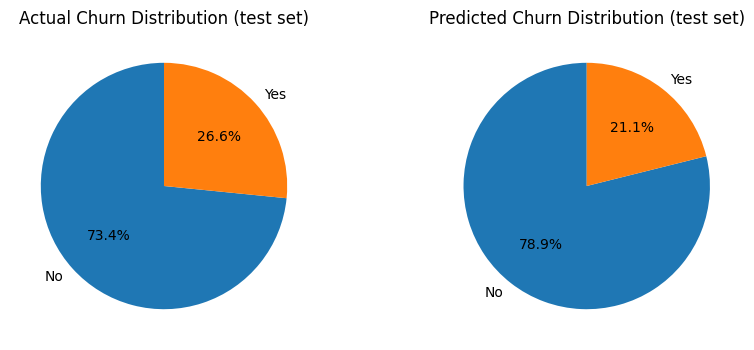

In [34]:
# Actual distribution
actual_counts = plot_df['Actual'].value_counts().sort_index()
pred_counts   = plot_df['Predicted'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(actual_counts, labels=['No','Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Actual Churn Distribution (test set)')

plt.subplot(1,2,2)
plt.pie(pred_counts, labels=['No','Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Predicted Churn Distribution (test set)')
plt.show()


In [35]:
# Combine test index, actual, predicted, and a few key original cols
out = df_test_orig[['customerID','Contract','PaymentMethod']].copy()   # adjust to your kept columns
out['ActualChurn'] = y_test.values
out['PredictedChurn'] = y_pred
out.to_csv('telco_churn_predictions_for_excel.csv', index=False)